Monte Carlo Ant System

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import hypot

Parameter setting

In [24]:
n=100
m=100
numberOfIterations=10
ro=0.5
alpha=1
beta=5

Initial Trail

In [25]:
tau=np.ones((n,n))*0.0001

City generation

In [26]:
np.random.seed(2)

#x=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
#y=[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
grid=True
if grid:
    xx,yy  = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
    xxx = xx.reshape([1,100])
    yyy = yy.reshape([1,100])
    x=xxx[0,:]
    y=yyy[0,:]
else:
    xy=np.random.rand(2,n)
    x=xy[0]
    y=xy[1]

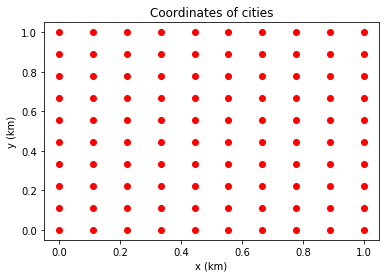

In [27]:
plt.plot(x,y,'ro')
plt.title('Coordinates of cities')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.show()

Distance measurement

In [28]:
d=np.zeros((n,n))
from math import hypot
for i in range(0,n):
    for j in range(0,n):
        d[i,j] = hypot((x[i]-x[j]), (y[i]-y[j]))

Heuristic information

In [29]:
h=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        if d[i,j]==0:
            h[i,j]=0;
        else:
            h[i,j]=1/d[i,j];

Iteration=0
The avg tour length=12.101177
The shortest tour length=11.248452


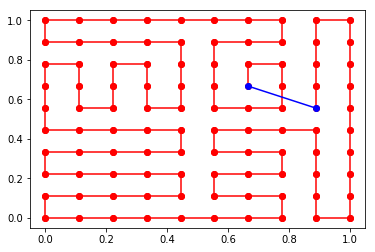

Iteration=1
The avg tour length=12.149737
The shortest tour length=11.111111


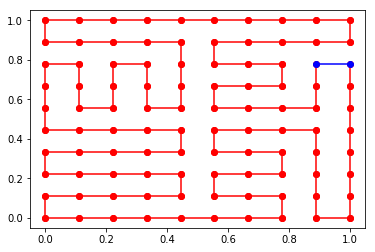

Iteration=2
The avg tour length=11.651295
The shortest tour length=11.111111


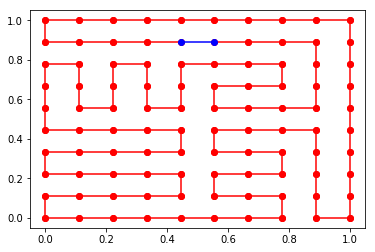

Iteration=3
The avg tour length=11.626012
The shortest tour length=11.111111


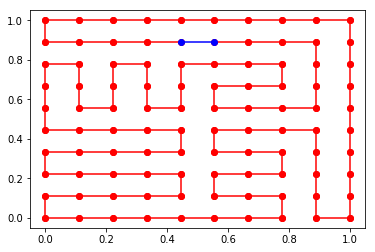

Iteration=4
The avg tour length=11.566280
The shortest tour length=11.111111


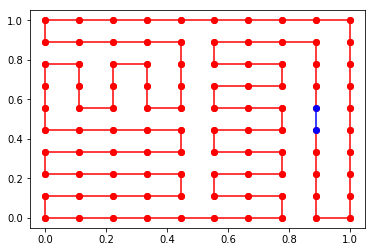

Iteration=5
The avg tour length=11.697229
The shortest tour length=11.111111


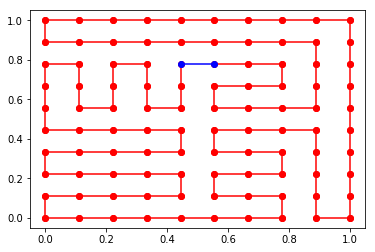

In [ ]:
from random import randint
road=np.ones((m,n))*(-10)
deltaTau=np.zeros((n,n))
#iteration 
for i in range(0,numberOfIterations):
    road=np.ones((m,n))*(-10)
    deltaTau=np.zeros((n,n))
    #initializes start places
    for j in range(0,m):
        road[j,0]=int(randint(0, (n-1)))
        #road[j,0]=j 
    for visit in range(0,(n-1)):
        for ant in range(0,m):
            destination=-1;
            pMax=0;
            sumC=0;
            for c in range(0,n):       
                if c not in road[ant,:]:
                    sumC=sumC+((tau[int(road[ant,visit]),c]**alpha)*(h[int(road[ant,visit]),c]**beta))       
            for city in range(0,n):
                if city not in road[ant,:]:
                    p=(tau[int(road[ant,visit]),city]*h[int(road[ant,visit]),city])/sumC           
                    if (p>=pMax):
                        pMax=p
                        destination=city
            road[ant,visit+1]=destination  
    #calculates tour length
    tourLength=np.zeros(m)
    for mm in range(0,m):
        for cc in range(0,(n-1)):
            tourLength[mm]=tourLength[mm]+d[int(road[mm,cc]),int(road[mm,cc+1])]
        tourLength[mm]=tourLength[mm]+d[int(road[mm,cc+1]),int(road[mm,0])]
    print("Iteration=%d" % i)
    print("The avg tour length=%f" % (np.sum(tourLength)/m))  
    print("The shortest tour length=%f" % np.min(tourLength))
    index=np.argmin(tourLength)
    for visitedCities in range(0, n-1):
        plt.plot([x[int(road[index,visitedCities])], x[int(road[index,visitedCities+1])]],[y[int(road[index,visitedCities])], y[int(road[index,visitedCities+1])]],'ro-')
    plt.plot([x[int(road[index,n-1])], x[int(road[index,0])]],[y[int(road[index,n-1])], y[int(road[index,0])]],'bo-')
    plt.show()
    #calculates sum of deltatau
    for ii in range(0,m):
        for jj in range(0,(n-1)):
            deltaTau[int(road[ii,jj]),int(road[ii,jj+1])]=deltaTau[int(road[ii,jj]),int(road[ii,jj+1])]+(1/tourLength[ii])
            deltaTau[int(road[ii,jj+1]),int(road[ii,jj])]=deltaTau[int(road[ii,jj]),int(road[ii,jj+1])]
        deltaTau[int(road[ii,jj+1]),int(road[ii,0])]=deltaTau[int(road[ii,jj+1]),int(road[ii,0])]+(1/tourLength[ii])
        deltaTau[int(road[ii,0]),int(road[ii,jj+1])]=deltaTau[int(road[ii,jj+1]),int(road[ii,0])]
    for iii in range(0,n):
        for jjj in range(0,n): 
            tau[iii,jjj]=(1-ro)*tau[iii,jjj]+deltaTau[iii,jjj]         

In [ ]:
index=np.argmin(tourLength)
for visitedCities in range(0, n-1):
    plt.plot([x[int(road[index,visitedCities])], x[int(road[index,visitedCities+1])]],[y[int(road[index,visitedCities])], y[int(road[index,visitedCities+1])]],'ro-')
plt.plot([x[int(road[index,n-1])], x[int(road[index,0])]],[y[int(road[index,n-1])], y[int(road[index,0])]],'bo-')
plt.show()

In [ ]:
road[index]